<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [2]:

sleep=pd.read_csv('C:\\Users\\Miranda\\Desktop\\ECON628-01-milambert\\datasets\\sleep\\sleep_bh.csv')

In [3]:
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [4]:
sleep.info()
##working with all floats and integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [5]:
sleep.describe()

C:\Users\Miranda\AppData\Local\Continuum\Anaconda2\envs\econ\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,NaN,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,NaN,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,NaN,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


In [6]:
sleep.male.describe()

count    706.000000
mean       0.566572
std        0.495900
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: male, dtype: float64

In [7]:
sleep.marr.describe()

count    706.00000
mean       0.82153
std        0.38318
min        0.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: marr, dtype: float64

In [8]:
sleep.sleep.describe()

count     706.000000
mean     3266.355524
std       444.413448
min       755.000000
25%      3015.000000
50%      3270.500000
75%      3532.250000
max      4695.000000
Name: sleep, dtype: float64

In [9]:
##generate weekly sleep in hours
sleep_hours=sleep['sleep']/60
sleep_hours.describe()

count    706.000000
mean      54.439259
std        7.406891
min       12.583333
25%       50.250000
50%       54.508333
75%       58.870833
max       78.250000
Name: sleep, dtype: float64

In [10]:
##generate nightly hours of sleep
sleep_hrs_night=sleep_hours/7
sleep_hrs_night.describe()

count    706.000000
mean       7.777037
std        1.058127
min        1.797619
25%        7.178571
50%        7.786905
75%        8.410119
max       11.178571
Name: sleep, dtype: float64

Summary Stats:

The average age is around 39 with about 5% of the poopulation identifying as black and almost 57% identifying as male. Approximately 82% of those surveyed are married with an average of 12.8 years of schooling and $9767.71 in yearly income. 75% of the sample population are in the labor force. More relevant to the current study, the average person sleeps around 3266 minutes per week or 7.78 hours pernight. 

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [11]:
print sleep.isnull().sum()
##It looks like we are missing a significant amount hourly wage data. This does not concern me too much because it should be directly correlated 
##with their income.
##It should be noted that these people may either be at a salaried position without an hourly wage (therefore likely
##above the mean) or they may be out of work (and therefore below the mean).


age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64


In [12]:
sleep = sleep.dropna(subset=['hrwage', 'lhrwage'], how='any')

print sleep.isnull().sum()
##Null values dropped successfully

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64


In [13]:
sleep.inlf.describe() 
##all 'inlf'= 1 because we took out those who had no hourly wage and were therefore apparently unemployed according to this data frames definition.

count    532.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: inlf, dtype: float64

## 3. Check for correlations
    Implement a correlation heatmap
---

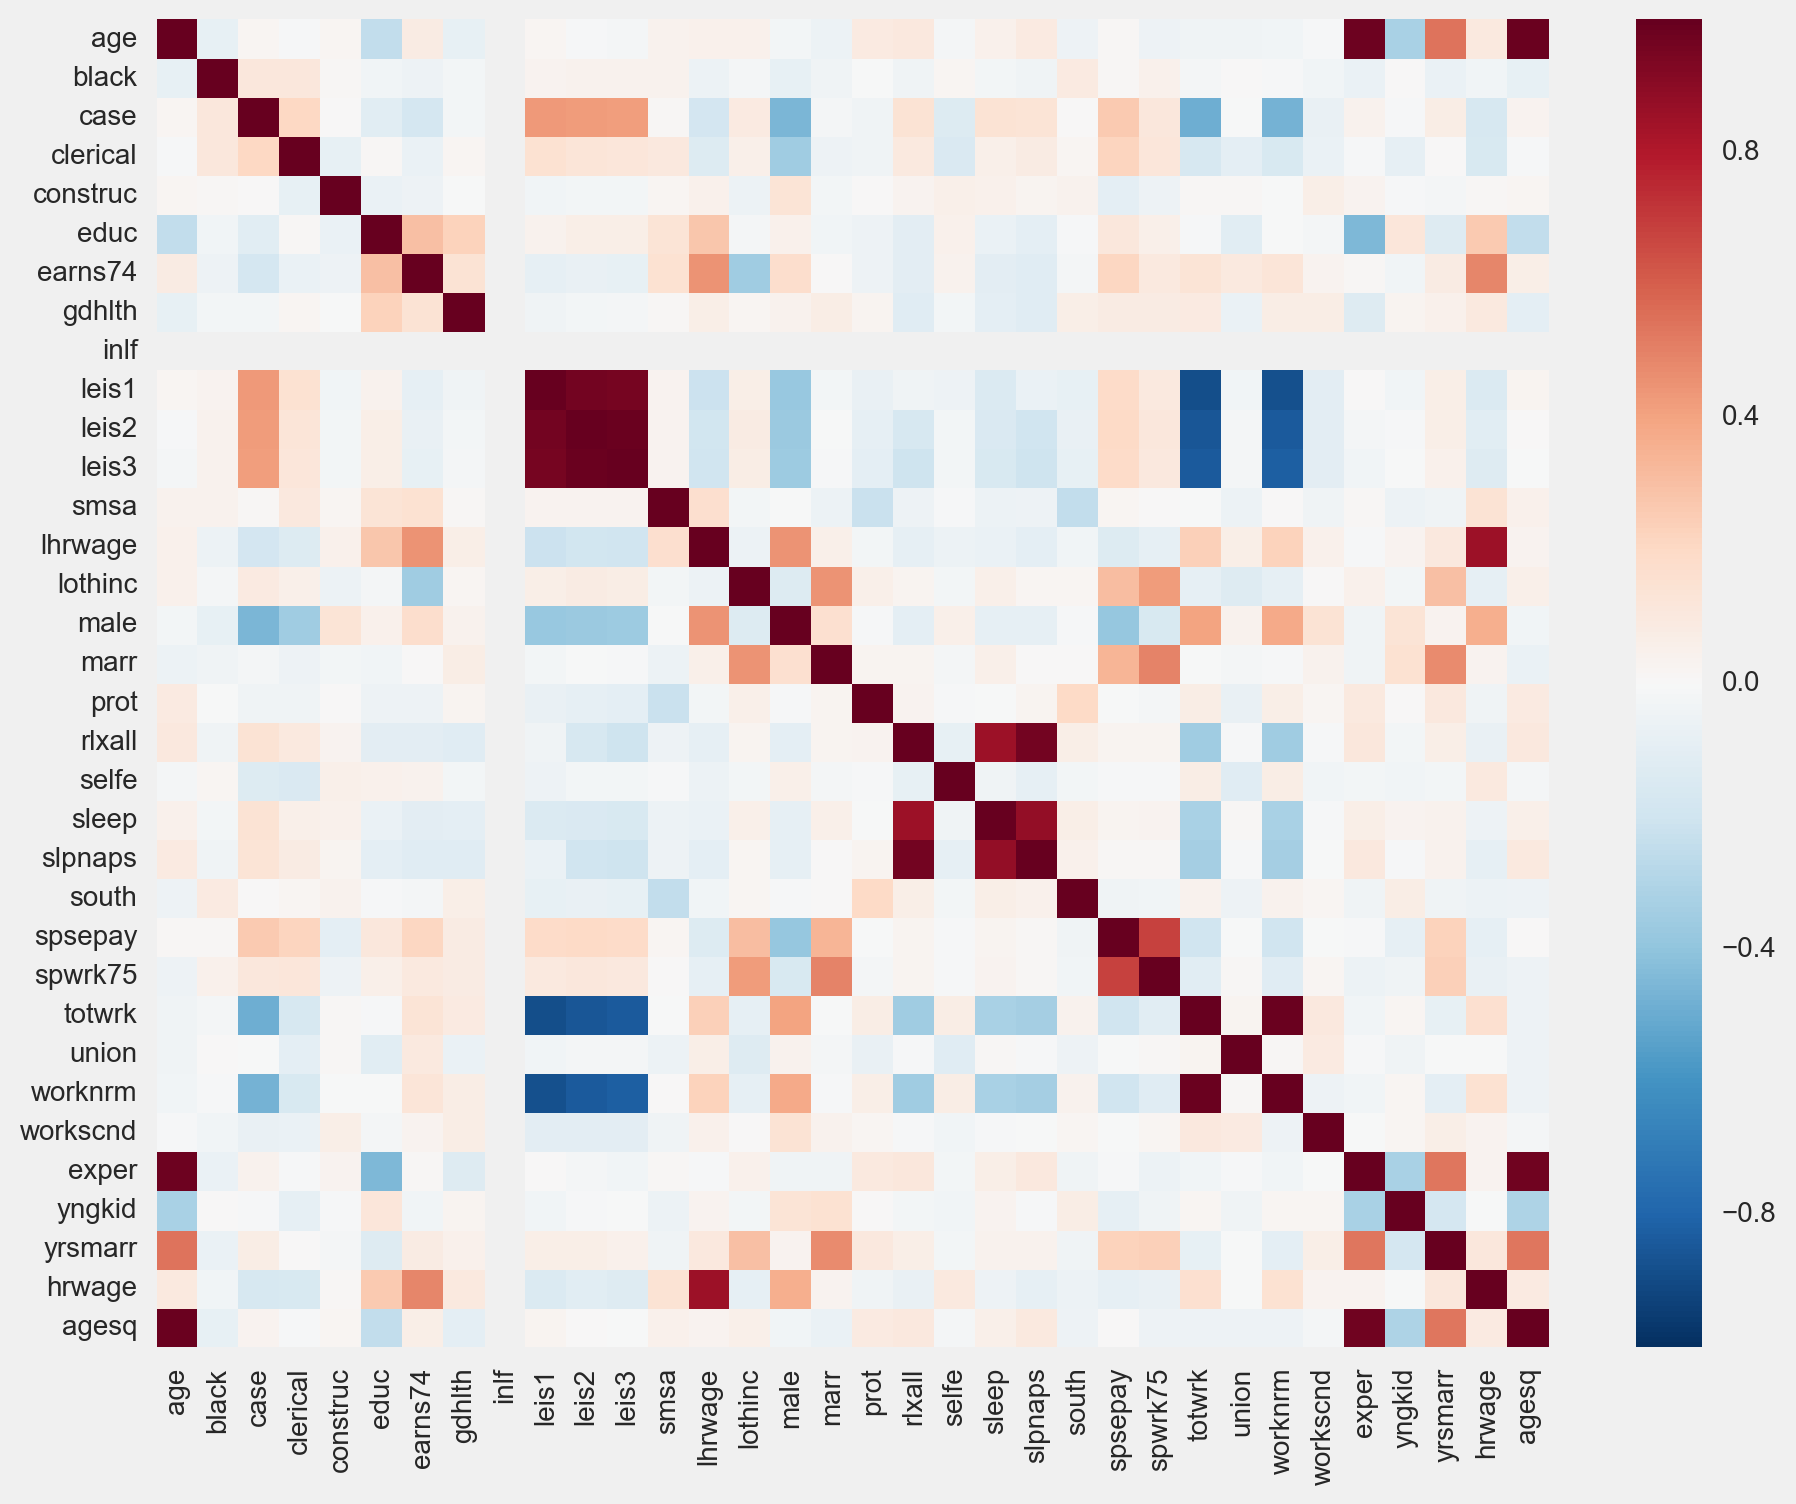

In [14]:
#Code adapted from Mario Carrillo lecture
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(sleep.corr(), ax=ax)
plt.show()

Here we see quite a few areas of strong correlation. Not surprisingly, the 3 measures of leasure almost perfectly correlate. Additionally, the leisure measures correlate strongly negatively to the measures of work. This is intuitive, but also implied by the fact that the work measures are a part of the leisure definition. RElevant here, we see a negative correlation between sleep/leisure and hours worked.

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [15]:
sleep.columns.tolist()

['age',
 'black',
 'case',
 'clerical',
 'construc',
 'educ',
 'earns74',
 'gdhlth',
 'inlf',
 'leis1',
 'leis2',
 'leis3',
 'smsa',
 'lhrwage',
 'lothinc',
 'male',
 'marr',
 'prot',
 'rlxall',
 'selfe',
 'sleep',
 'slpnaps',
 'south',
 'spsepay',
 'spwrk75',
 'totwrk',
 'union',
 'worknrm',
 'workscnd',
 'exper',
 'yngkid',
 'yrsmarr',
 'hrwage',
 'agesq']

In [16]:
##Code adapted from "Logistic Evaluation Lab" by Mario Carrillo
##Create X and y
indep=sleep.columns.tolist()

##Take out columns that will not be useful or are colinear with sleep 
not_X=['sleep', 'case','lothic','leis1','rlxall','slpnaps']

In [17]:
y=sleep.sleep.values
X=sleep[[a for a in indep if a not in not_X]]
print X.shape, y.shape


(532, 29) (532L,)


In [18]:
##The following code is adapted from "Mega Lab" by MArio Carrillo

In [19]:
##Standardize

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn=ss.fit_transform(X)

In [20]:
##Split data into train and test

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(372L, 29L) (160L, 29L)


(372L,) (160L,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

In [21]:
##import and definte OLS packages 

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
##fit model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
##import r-squared and MSE measures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [23]:
##defining a function to make predictions based on the tran data.
##This will allow us to work through all of the regression models without having to create new code for each type.

def r2_mse(ytrain, testy, xtrain, testx, model, best_model):
    ##actual predictions
    predict_y_train=best_model.predict(xtrain)
    predict_y_test=best_model.predict(testx)
    
    ##MSE
    print ('mse' + model + ' train: %.2f, test: %.2f' % (
        mean_squared_error(ytrain, predict_y_train),
        mean_squared_error(testy, predict_y_test)))
    
    ##r-squared
    print ('r_sqared'+ model+' train: %.2f, test: %.2f' % (
        r2_score(ytrain, predict_y_train),
        r2_score(testy, predict_y_test)))

In [24]:
r2_mse(y_train, y_test, X_train, X_test, 'OLS', lr)

##You can see a HUGE MSE which can most likely be attributed to underfitting of the model. That is, a forced linear relationship when the true relationship takes on a vastly different shape. 

mseOLS train: 35828.28, test: 48209.72
r_sqaredOLS train: 0.81, test: 0.73


In [25]:
##Visualize



## 4.2.2 Regularization
    
---

In [26]:
##import regularization methods
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
ridge?


Object `ridge` not found.


Ridge Regression

In [27]:
##Specify alpha
ridge_a= np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_a, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

1.0


In [28]:
##implement and fit

ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
##Evaluate using definition
r2_mse(y_train, y_test, X_train, X_test, 'Ridge_Regression', ridge)

##MSE is still far too large, but train and test are slightly closer. This model has sacrificed efficiency for explanatory power. 

mseRidge_Regression train: 36010.24, test: 47838.22
r_sqaredRidge_Regression train: 0.81, test: 0.73


Lasso Regression

In [30]:
##optimal alpha

optimal_lasso = LassoCV(cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

4.68472754778


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [31]:
##Run regression and fit to test data

lasso= Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)

Lasso(alpha=4.6847275477790271, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
##Evaluate Lasso using definition
r2_mse(y_train, y_test, X_train, X_test, 'Lasso_Regression', lasso)

##MSE is still crazy high, but it is starting to come down due to the fact that Lasso regressions assume all miniscule 
##variables to 0 where as the Ridge regression allowed them to approach 0, but remain in the regression. 

mseLasso_Regression train: 36715.57, test: 46243.13
r_sqaredLasso_Regression train: 0.80, test: 0.74


Elastic Net

In [33]:
##Optimal Alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios,cv=10, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

4.68472754778
1.0


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.2s finis

In [34]:
##Create and fit

elastic_net = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=4.6847275477790271, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [35]:
##evaluate usting the definition 
r2_mse(y_train, y_test, X_train, X_test, 'Elastic_Net', elastic_net)


mseElastic_Net train: 36715.57, test: 46243.13
r_sqaredElastic_Net train: 0.80, test: 0.74


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [36]:
##Code from Mega Lab by Mario Carillo

def top_features(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)

    return method_coefs.head(15)

In [37]:
top_features(X, lasso)

,abs_coef,coef,variable
20,701.555971,-701.555971,totwrk
8,669.847799,-669.847799,leis2
14,21.087256,21.087256,marr
15,20.682506,-20.682506,prot
25,17.497731,17.497731,yngkid
13,9.624540,-9.624540,male
3,7.730870,7.730870,construc
10,7.092000,-7.092000,smsa
27,6.188493,6.188493,hrwage
6,5.626564,5.626564,gdhlth


Here we see some interesting results! Understandably, we see that more total hours worked leads to less sleep. Interestingly, we also see that as naps increase their nightly sleep decreases. Marriage increases the amount of sleep you get and surprisingly, so does having a young child, but only by 17 minutes. Being protestant has a negative impact on your nightly minutes slept. Sociologists might attribute this to the protestant work ethic that would imply more hours worked by protestants. Lastly, we see a positive correlation with hourly wage. It is likely that people with a higher wage can work less and sleep more.

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
##grid search for best features
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

##Cross Validate
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=10, verbose=1)

In [40]:
##fit
dtr_gs.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    4.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [41]:
##define the best estimators
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=7,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 7, 'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 3}


best score 0.476443872549


In [43]:
def important_features(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [44]:
feature_importance(X, dtr_best)

,feature,importance
9,leis3,0.262386
20,totwrk,0.250257
8,leis2,0.211225
22,worknrm,0.190759
24,exper,0.014636
11,lhrwage,0.013860
26,yrsmarr,0.011338
5,earns74,0.010191
12,lothinc,0.009299
27,hrwage,0.006650


Some of these features, like hours worked and naps, remain as top predictors of sleep.In this model, hours worked at the normal job jumps up in importance, which is what I had expected in the previous model due to its correlation with total hours worked. Interestingly, the number one predictor here is minutes of relaxation, which was not important in the lasso regression.

In [45]:
## Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 2632.4       ,  2248.2       ,  3457.        ,  3314.5       ,
        3791.33333333,  3329.5       ,  3560.6       ,  2838.16666667,
        2936.66666667,  3527.        ,  3520.2       ,  3457.        ,
        3520.2       ,  3520.2       ,  3269.        ,  3184.6       ,
        3107.75      ,  3107.75      ,  2993.83333333,  2985.        ,
        3422.5       ,  4204.5       ,  3314.5       ,  3361.        ,
        3704.83333333,  3184.6       ,  3107.75      ,  3327.75      ,
        3590.33333333,  2965.8       ,  3412.83333333,  3560.6       ,
        3329.5       ,  3419.33333333,  3121.8       ,  3107.75      ,
        3412.83333333,  3603.8       ,  3325.75      ,  3890.33333333,
        2514.        ,  3329.5       ,  3717.2       ,  3560.6       ,
        3359.25      ,  3184.6       ,  2936.33333333,  3421.        ,
        3520.2       ,  3051.83333333,  3137.25      ,  3329.5       ,
        3195.33333333,  2248.2       ,  2918.66666667,  3560.6       ,
      

In [46]:
r2_mse(y_train, y_test, X_train, X_test, 'Decision_Tree', dtr_best)

mseDecision_Tree train: 16805.95, test: 103244.16
r_sqaredDecision_Tree train: 0.91, test: 0.42


In [ ]:
##We see a huge overfitting of the model as seen by the huge MSE in the test and the smaller one (relative to other models)for the train data

In [47]:
## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

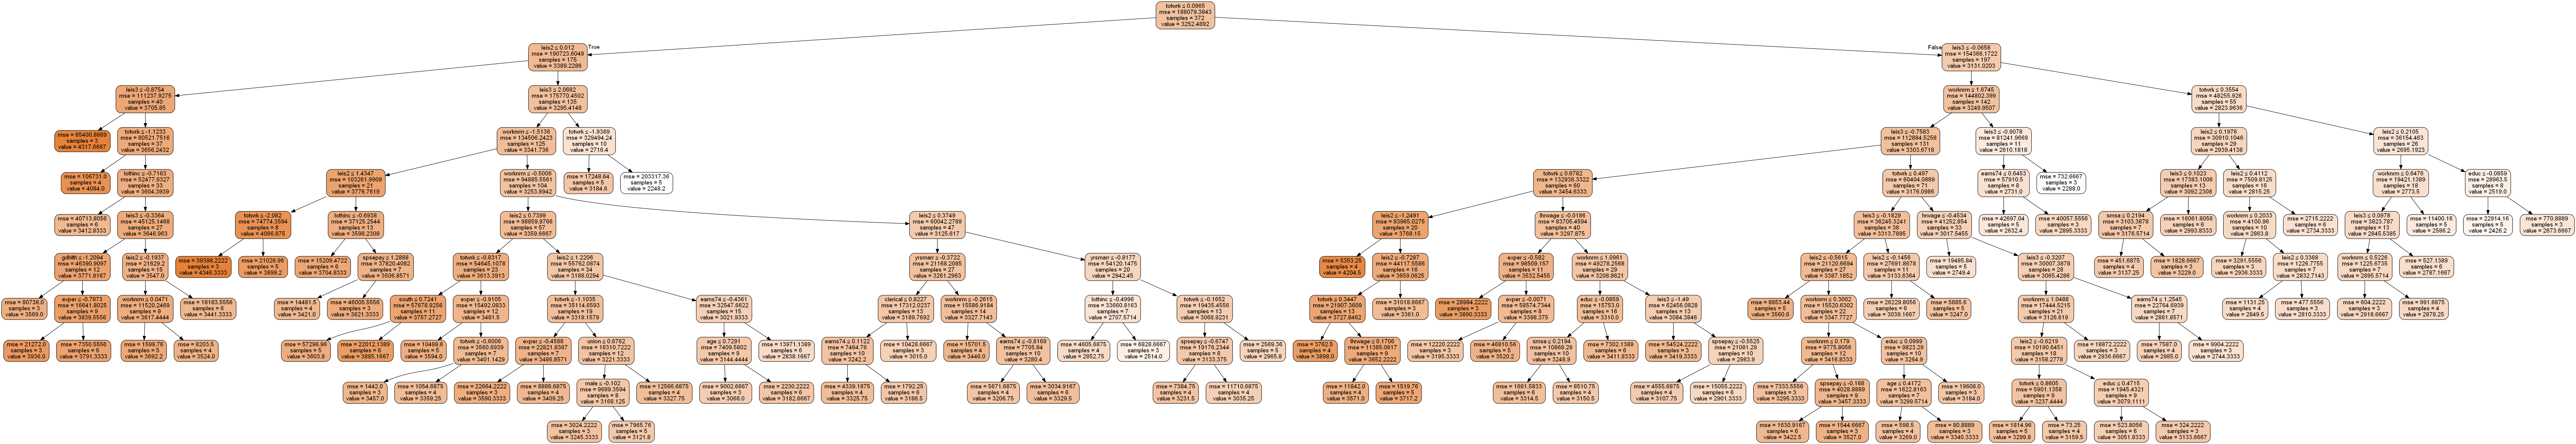

In [48]:
dot_data = StringIO()


export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [49]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=10,verbose=1)

In [50]:
##Fit Random Forest
estimator_rfr.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   22.9s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [51]:
##best estimators
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 4, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 3}


best score 0.413516580401


In [52]:
feature_importance(X, rfr_best)

,feature,importance
20,totwrk,0.340177
9,leis3,0.243614
8,leis2,0.232704
22,worknrm,0.174970
12,lothinc,0.003211
26,yrsmarr,0.002195
27,hrwage,0.001225
18,spsepay,0.001021
13,male,0.000884
0,age,0.000000


In [53]:
##total work and leisure still important

In [54]:
##predict and fit
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 2812.19032094,  3171.86823017,  3350.30798271,  3209.54050986,
        3496.4786613 ,  3134.06064462,  3400.34552358,  3393.53382183,
        3182.43166977,  3395.39556817,  3242.85521207,  3390.33049099,
        3164.45915036,  3258.2917124 ,  3402.84765063,  3091.12564044,
        3245.37953025,  3249.99045648,  3015.87143518,  3110.86591195,
        3416.30719015,  3579.76882758,  3264.40740069,  3278.52331   ,
        3475.70573982,  3155.18048309,  3194.56668287,  3351.07519153,
        3381.64175114,  3100.71153517,  3418.48014128,  3534.24317873,
        3144.12375525,  3279.3352573 ,  3344.41815812,  3152.24662007,
        3592.91567803,  3543.65284423,  3186.85963117,  3265.06360681,
        3072.17930872,  3130.8240936 ,  3553.11776063,  3385.61191154,
        3393.7675205 ,  3177.95179779,  2981.1257043 ,  3434.13937057,
        3279.3352573 ,  3163.53610382,  3063.73090373,  3143.18254863,
        3258.57108054,  3186.38111044,  2941.55275893,  3512.01223721,
      

In [55]:
r2_mse(y_train, y_test, X_train, X_test, 'Random_Forest', rfr_best)

mseRandom_Forest train: 76330.34, test: 100885.53
r_sqaredRandom_Forest train: 0.59, test: 0.44


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

In this case, Lasso and Elastic net perform almost identically and slightly better than the Ridge and OLS regression in terms of r-squared and MSE. The tree and forest both appear to overfit to the train data causing skewed MSE and r-squared. 

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS:

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS: